In [1]:
import os
import re
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

from impedance import preprocessing
from impedance.models.circuits.circuits import CustomCircuit
from impedance.visualization import plot_nyquist

import analyze_comsol as an_com

%reload_ext autoreload
%autoreload 2

In [144]:
file_dir = r"A:\BrianGerwe\Research\COMSOL\PatternedFilm_Potentiodynamic\3D\Table Exports\NoHole_Pinholes"

# We need to treat data flagged "N-0" differently, since they represent a film without a mask
# Therefore the impedance is calculated a little different in COMSOL
G = r"\G-100"
N = '' #r"_N-5"
k = '' #'k-5'
r_h = r"r-5e-3L"
f_res = r"10pt-dec"
M = "M-0_01L"
pO2 = '' #"_pO2-0_01"

all_files = an_com.get_all_files(file_dir, G, N, k, r_h, f_res, M, pO2)
all_files

['A:\\BrianGerwe\\Research\\COMSOL\\PatternedFilm_Potentiodynamic\\3D\\Table Exports\\NoHole_Pinholes\\G-100_N-15_k-1_r-5e-3L_f-[1e-3,1e8]_10pt-dec_M-0_01L_pO2-0_01_3.csv',
 'A:\\BrianGerwe\\Research\\COMSOL\\PatternedFilm_Potentiodynamic\\3D\\Table Exports\\NoHole_Pinholes\\G-100_N-15_k-1_r-5e-3L_f-[1e-3,1e8]_10pt-dec_M-0_01L_pO2-0_01.csv',
 'A:\\BrianGerwe\\Research\\COMSOL\\PatternedFilm_Potentiodynamic\\3D\\Table Exports\\NoHole_Pinholes\\G-100_N-5_k-10_r-5e-3L_f-[1e-3,1e8]_10pt-dec_M-0_01L_pO2-0_01.csv',
 'A:\\BrianGerwe\\Research\\COMSOL\\PatternedFilm_Potentiodynamic\\3D\\Table Exports\\NoHole_Pinholes\\G-100_N-15_k-1_r-5e-3L_f-[1e-3,1e8]_10pt-dec_M-0_01L_pO2-0_01_2.csv',
 'A:\\BrianGerwe\\Research\\COMSOL\\PatternedFilm_Potentiodynamic\\3D\\Table Exports\\NoHole_Pinholes\\G-100_N-15_k-1_r-5e-3L_f-[1e-3,1e8]_10pt-dec_M-0_01L_1pO2-0_01.csv',
 'A:\\BrianGerwe\\Research\\COMSOL\\PatternedFilm_Potentiodynamic\\3D\\Table Exports\\NoHole_Pinholes\\G-100_N-5_k-5_r-5e-3L_f-[1e-3,1e8]_10

G-100_N-15_k-1_r-5e-3L_f-[1e-3,1e8]_10pt-dec_M-0_01L_pO2-0_01_3.csv
# of holes                    15
randomness                     1
Pinhole Area (m^2)    0.00793806
Name: 0, dtype: object
Filtered 1 data points with positive Im[Z]
Peak frequencies: 1258925.4117941658
G-100_N-15_k-1_r-5e-3L_f-[1e-3,1e8]_10pt-dec_M-0_01L_pO2-0_01.csv
# of holes                    15
randomness                     1
Pinhole Area (m^2)    0.00793806
Name: 0, dtype: object
Filtered 1 data points with positive Im[Z]
Peak frequencies: 1258925.4117941658


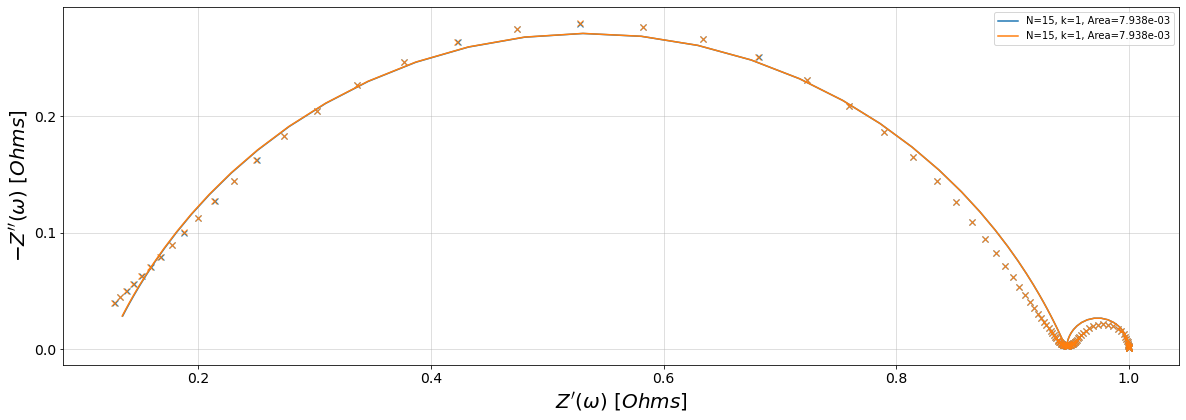

In [145]:
_, ax = plt.subplots(figsize=(20,15))
fs, Zs, circs = [], [], []

for i, file in enumerate(all_files[:2]):
    print(file.split('holes\\')[-1])
    dum = pd.read_csv(file, skiprows=4)
    
    feats = dum.loc[0, ['# of holes', 'randomness', 'Pinhole Area (m^2)']]
    print(feats)
#     dat = pd.read_csv(file, skiprows=4)
    ax, f, Z, circ = an_com.fit_R_RCPE_RC(file, ax, ind=f'N={feats[0]}, k={feats[1]}, Area={feats[2]:.3e}', scale=True)
#      print(i, file.split("holes\\")[-1])
#     f, Z = an_com.extract_plot_Z_scaled(file, ax, i)
#     plot_nyquist(ax, Z/Z[-1], label=i)
    print(f'Peak frequencies: {f[np.argmin(Z.imag)]}')
#     print(circ)

    fs.append(f)
    Zs.append(Z)
    circs.append(circ)

plt.legend()
plt.show()

## More refined fitting than R-R//CPE-R

In [152]:
all_files

['A:\\BrianGerwe\\Research\\COMSOL\\PatternedFilm_Potentiodynamic\\3D\\Table Exports\\NoHole_Pinholes\\G-100_N-15_k-1_r-5e-3L_f-[1e-3,1e8]_10pt-dec_M-0_01L_pO2-0_01_3.csv',
 'A:\\BrianGerwe\\Research\\COMSOL\\PatternedFilm_Potentiodynamic\\3D\\Table Exports\\NoHole_Pinholes\\G-100_N-15_k-1_r-5e-3L_f-[1e-3,1e8]_10pt-dec_M-0_01L_pO2-0_01.csv',
 'A:\\BrianGerwe\\Research\\COMSOL\\PatternedFilm_Potentiodynamic\\3D\\Table Exports\\NoHole_Pinholes\\G-100_N-5_k-10_r-5e-3L_f-[1e-3,1e8]_10pt-dec_M-0_01L_pO2-0_01.csv',
 'A:\\BrianGerwe\\Research\\COMSOL\\PatternedFilm_Potentiodynamic\\3D\\Table Exports\\NoHole_Pinholes\\G-100_N-15_k-1_r-5e-3L_f-[1e-3,1e8]_10pt-dec_M-0_01L_pO2-0_01_2.csv',
 'A:\\BrianGerwe\\Research\\COMSOL\\PatternedFilm_Potentiodynamic\\3D\\Table Exports\\NoHole_Pinholes\\G-100_N-15_k-1_r-5e-3L_f-[1e-3,1e8]_10pt-dec_M-0_01L_1pO2-0_01.csv',
 'A:\\BrianGerwe\\Research\\COMSOL\\PatternedFilm_Potentiodynamic\\3D\\Table Exports\\NoHole_Pinholes\\G-100_N-5_k-5_r-5e-3L_f-[1e-3,1e8]_10

N=15, k=1, Area=7.938e-03
Filtered 1 data points with positive Im[Z]
Peak frequencies: 1.259e+06

Circuit string: R0-p(R1,CPE1)-p(R2,CPE2)-G3
Fit: True

Initial guesses:
     R0 = 3.86e-01 [Ohm]
     R1 = 2.47e+00 [Ohm]
  CPE1_0 = 5.13e-08 [Ohm^-1 sec^a]
  CPE1_1 = 8.00e-01 []
     R2 = 7.98e-02 [Ohm]
  CPE2_0 = 2.51e+01 [Ohm^-1 sec^a]
  CPE2_1 = 8.00e-01 []
   G3_0 = 7.98e-02 [Ohm]
   G3_1 = 2.34e+00 [sec]

Fit parameters:
     R0 = 2.63e-01  (+/- 3.85e-03) [Ohm]
     R1 = 1.65e+00  (+/- 3.00e-02) [Ohm]
  CPE1_0 = 6.81e-07  (+/- 2.62e-08) [Ohm^-1 sec^a]
  CPE1_1 = 8.67e-01  (+/- 3.60e-03) []
     R2 = 9.31e-01  (+/- 2.68e-02) [Ohm]
  CPE2_0 = 5.09e-04  (+/- 7.11e-05) [Ohm^-1 sec^a]
  CPE2_1 = 4.64e-01  (+/- 7.92e-03) []
   G3_0 = 1.62e-01  (+/- 7.53e-04) [Ohm]
   G3_1 = 3.92e+00  (+/- 6.52e-02) [sec]



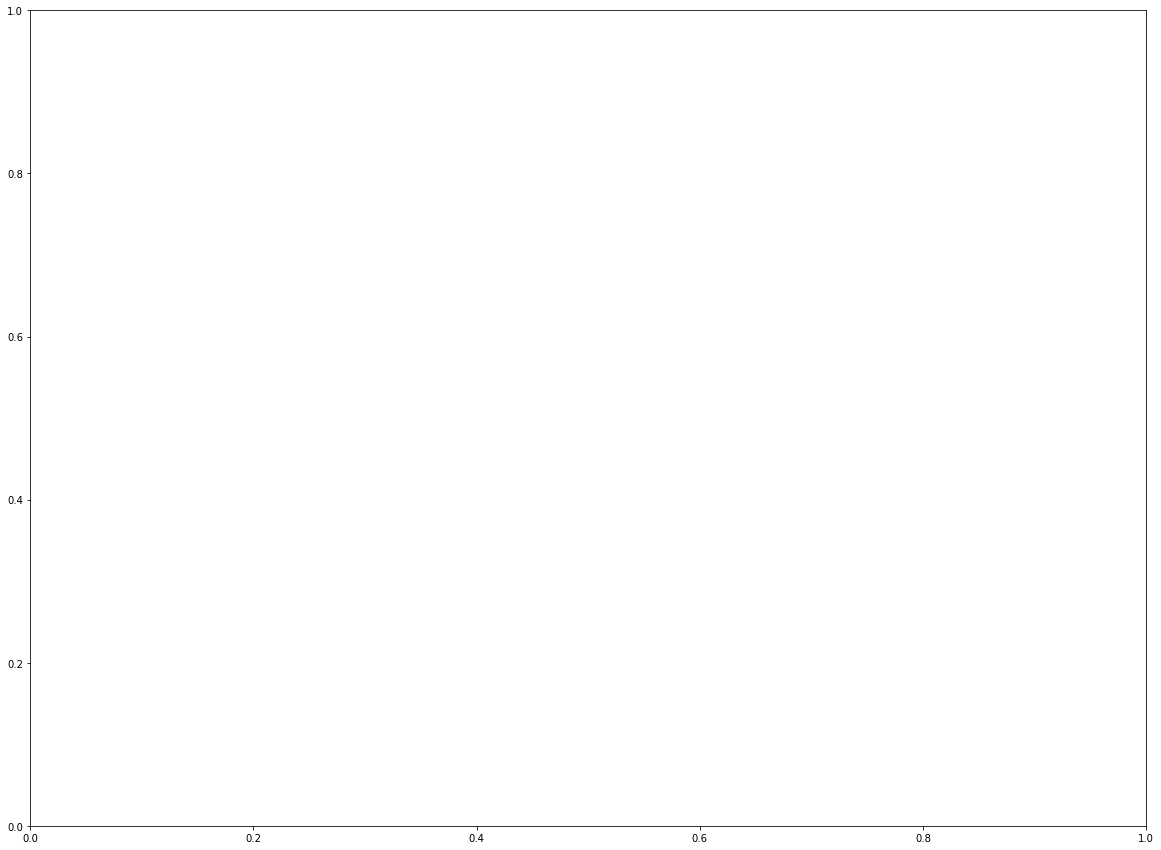

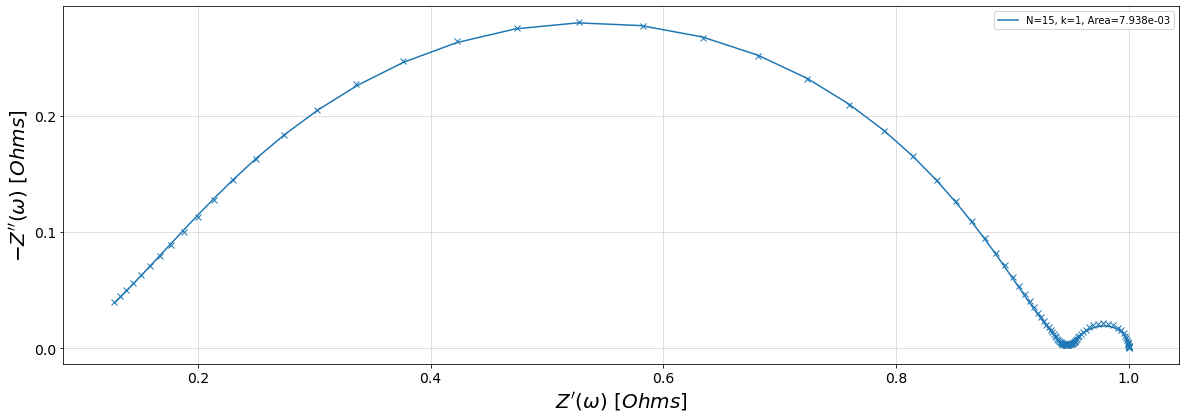

N=15, k=1, Area=7.938e-03
Filtered 1 data points with positive Im[Z]
Peak frequencies: 1.259e+06

Circuit string: R0-p(R1,CPE1)-p(R2,CPE2)-G3
Fit: True

Initial guesses:
     R0 = 3.85e-01 [Ohm]
     R1 = 2.47e+00 [Ohm]
  CPE1_0 = 5.12e-08 [Ohm^-1 sec^a]
  CPE1_1 = 8.00e-01 []
     R2 = 7.99e-02 [Ohm]
  CPE2_0 = 2.51e+01 [Ohm^-1 sec^a]
  CPE2_1 = 8.00e-01 []
   G3_0 = 7.99e-02 [Ohm]
   G3_1 = 2.34e+00 [sec]

Fit parameters:
     R0 = 2.61e-01  (+/- 3.92e-03) [Ohm]
     R1 = 1.66e+00  (+/- 3.00e-02) [Ohm]
  CPE1_0 = 6.81e-07  (+/- 2.62e-08) [Ohm^-1 sec^a]
  CPE1_1 = 8.66e-01  (+/- 3.60e-03) []
     R2 = 9.32e-01  (+/- 2.68e-02) [Ohm]
  CPE2_0 = 5.15e-04  (+/- 7.19e-05) [Ohm^-1 sec^a]
  CPE2_1 = 4.63e-01  (+/- 7.95e-03) []
   G3_0 = 1.62e-01  (+/- 7.58e-04) [Ohm]
   G3_1 = 3.92e+00  (+/- 6.56e-02) [sec]



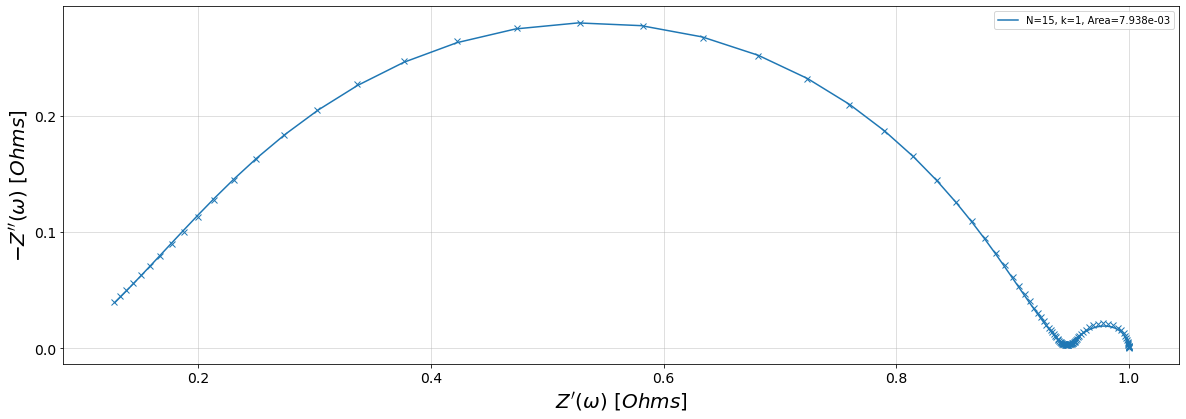

N=5, k=10, Area=3.725e-02
Filtered 1 data points with positive Im[Z]
Peak frequencies: 1.259e+05

Circuit string: R0-p(R1,CPE1)-p(R2,CPE2)-G3
Fit: True

Initial guesses:
     R0 = 2.80e-01 [Ohm]
     R1 = 1.63e+00 [Ohm]
  CPE1_0 = 7.75e-07 [Ohm^-1 sec^a]
  CPE1_1 = 8.00e-01 []
     R2 = 8.83e-02 [Ohm]
  CPE2_0 = 2.27e+01 [Ohm^-1 sec^a]
  CPE2_1 = 8.00e-01 []
   G3_0 = 8.83e-02 [Ohm]
   G3_1 = 2.34e+00 [sec]

Fit parameters:
     R0 = 2.65e-01  (+/- 1.17e-03) [Ohm]
     R1 = 1.55e+00  (+/- 1.94e-03) [Ohm]
  CPE1_0 = 2.91e-04  (+/- 4.48e-06) [Ohm^-1 sec^a]
  CPE1_1 = 5.70e-01  (+/- 1.19e-03) []
     R2 = 1.74e-01  (+/- 2.60e-03) [Ohm]
  CPE2_0 = 7.36e+00  (+/- 2.59e-01) [Ohm^-1 sec^a]
  CPE2_1 = 8.13e-01  (+/- 1.39e-02) []
   G3_0 = 1.00e-01  (+/- 2.12e-03) [Ohm]
   G3_1 = 2.55e-02  (+/- 1.49e-03) [sec]



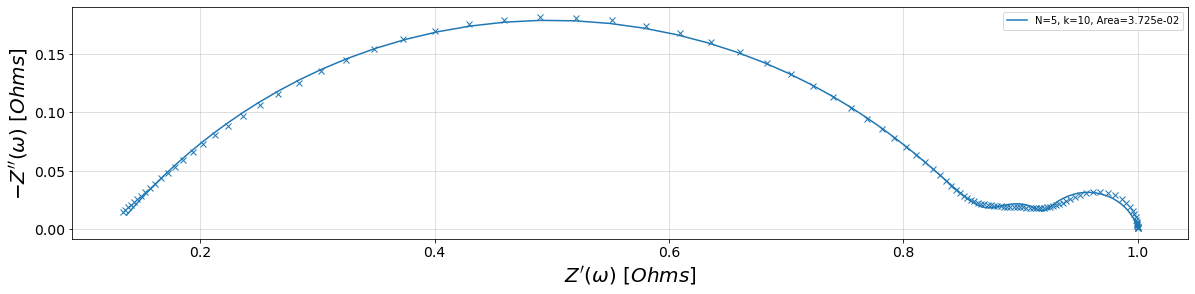

N=15, k=1, Area=7.938e-03
Filtered 1 data points with positive Im[Z]
Peak frequencies: 1.259e+06

Circuit string: R0-p(R1,CPE1)-p(R2,CPE2)-G3
Fit: True

Initial guesses:
     R0 = 3.85e-01 [Ohm]
     R1 = 2.47e+00 [Ohm]
  CPE1_0 = 5.12e-08 [Ohm^-1 sec^a]
  CPE1_1 = 8.00e-01 []
     R2 = 7.99e-02 [Ohm]
  CPE2_0 = 2.51e+01 [Ohm^-1 sec^a]
  CPE2_1 = 8.00e-01 []
   G3_0 = 7.99e-02 [Ohm]
   G3_1 = 2.34e+00 [sec]

Fit parameters:
     R0 = 2.61e-01  (+/- 3.92e-03) [Ohm]
     R1 = 1.66e+00  (+/- 3.00e-02) [Ohm]
  CPE1_0 = 6.81e-07  (+/- 2.62e-08) [Ohm^-1 sec^a]
  CPE1_1 = 8.66e-01  (+/- 3.60e-03) []
     R2 = 9.32e-01  (+/- 2.68e-02) [Ohm]
  CPE2_0 = 5.15e-04  (+/- 7.19e-05) [Ohm^-1 sec^a]
  CPE2_1 = 4.63e-01  (+/- 7.95e-03) []
   G3_0 = 1.62e-01  (+/- 7.58e-04) [Ohm]
   G3_1 = 3.92e+00  (+/- 6.56e-02) [sec]



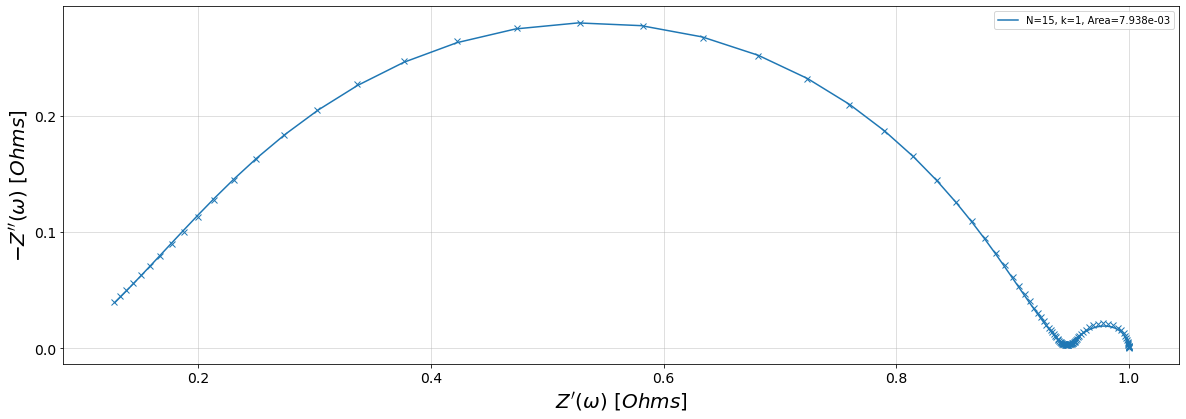

N=15, k=3, Area=1.815e-02
Filtered 3 data points with positive Im[Z]
Peak frequencies: 3.162e+04

Circuit string: R0-p(R1,CPE1)-p(R2,CPE2)-G3
Fit: True

Initial guesses:
     R0 = 2.41e-01 [Ohm]
     R1 = 6.33e+00 [Ohm]
  CPE1_0 = 7.96e-07 [Ohm^-1 sec^a]
  CPE1_1 = 8.00e-01 []
     R2 = 7.65e-02 [Ohm]
  CPE2_0 = 2.62e+01 [Ohm^-1 sec^a]
  CPE2_1 = 8.00e-01 []
   G3_0 = 7.65e-02 [Ohm]
   G3_1 = 2.34e+00 [sec]

Fit parameters:
     R0 = 4.55e-01  (+/- 1.96e-02) [Ohm]
     R1 = 6.15e+00  (+/- 2.99e-02) [Ohm]
  CPE1_0 = 3.52e-06  (+/- 3.07e-07) [Ohm^-1 sec^a]
  CPE1_1 = 8.60e-01  (+/- 7.08e-03) []
     R2 = 1.19e-01  (+/- 4.85e-01) [Ohm]
  CPE2_0 = 1.76e+01  (+/- 7.24e+01) [Ohm^-1 sec^a]
  CPE2_1 = 9.96e-01  (+/- 1.03e+00) []
   G3_0 = 7.34e-12  (+/- 4.88e-01) [Ohm]
   G3_1 = 6.70e+00  (+/- 0.00e+00) [sec]



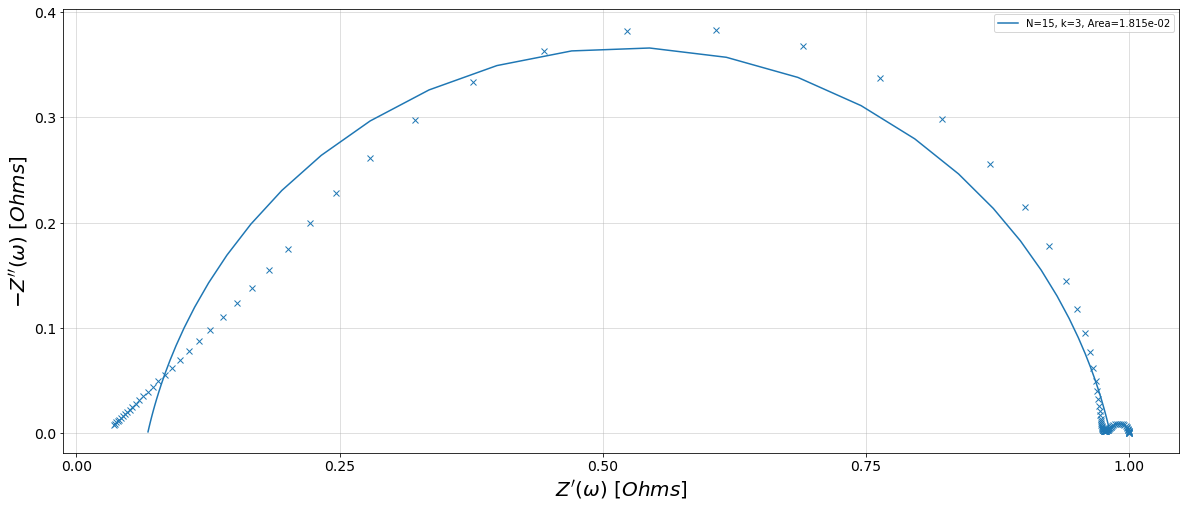

N=5, k=5, Area=1.210e-02
Filtered 1 data points with positive Im[Z]
Peak frequencies: 3.981e+05

Circuit string: R0-p(R1,CPE1)-p(R2,CPE2)-G3
Fit: True

Initial guesses:
     R0 = 5.04e-01 [Ohm]
     R1 = 3.05e+00 [Ohm]
  CPE1_0 = 1.31e-07 [Ohm^-1 sec^a]
  CPE1_1 = 8.00e-01 []
     R2 = 8.59e-02 [Ohm]
  CPE2_0 = 2.33e+01 [Ohm^-1 sec^a]
  CPE2_1 = 8.00e-01 []
   G3_0 = 8.59e-02 [Ohm]
   G3_1 = 2.34e+00 [sec]

Fit parameters:
     R0 = 5.04e-01  (+/- 2.33e-01) [Ohm]
     R1 = 3.05e+00  (+/- 2.60e-01) [Ohm]
  CPE1_0 = 3.42e-07  (+/- 4.28e-07) [Ohm^-1 sec^a]
  CPE1_1 = 8.00e-01  (+/- 7.74e-02) []
     R2 = 8.59e-02  (+/- 2.05e+00) [Ohm]
  CPE2_0 = 2.33e+01  (+/- 1.58e+03) [Ohm^-1 sec^a]
  CPE2_1 = 8.00e-01  (+/- 1.51e+01) []
   G3_0 = 8.59e-02  (+/- 2.04e+00) [Ohm]
   G3_1 = 2.34e+00  (+/- 1.96e+02) [sec]



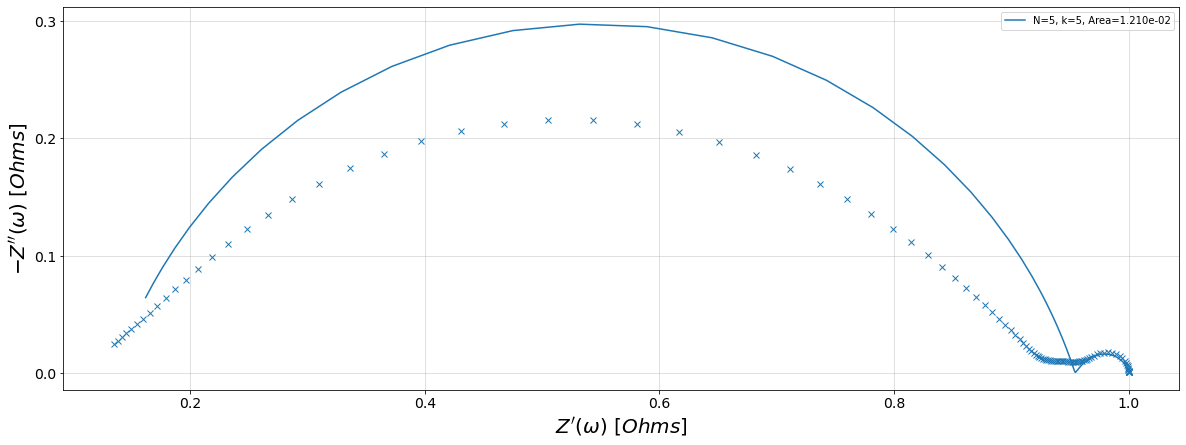

In [156]:
fs, Zs, circs = [], [], []

for i, file in enumerate(all_files):
#     print(file.split('holes\\')[-1])
    _, ax = plt.subplots(figsize=(20,15))
    dum = pd.read_csv(file, skiprows=4)
    
    feats = dum.loc[0, ['# of holes', 'randomness', 'Pinhole Area (m^2)']]
    label = f'N={feats[0]}, k={feats[1]}, Area={feats[2]:.3e}'
    print(label)
    ax, f, Z, circ = an_com.fit_R_RCPE_RCPE_G(file, ax, 2.344, ind=label, scale=True)
    print(f'Peak frequencies: {f[np.argmin(Z.imag)]:.3e}')
    print(circ)
    fs.append(f)
    Zs.append(Z)
    circs.append(circ)

    plt.legend()
    plt.show()

In [2]:
file = all_files[-1]

_, ax = plt.subplots(figsize=(20,15))
dum = pd.read_csv(file, skiprows=4)

feats = dum.loc[0, ['# of holes', 'randomness', 'Pinhole Area (m^2)']]
label = f'N={feats[0]}, k={feats[1]}, Area={feats[2]:.3e}'
print(label)
ax, f, Z, circ = an_com.fit_R_RCPE_RCPE_G(file, ax, 2.344, a_init=.5, ind=label, scale=True)
print(f'Peak frequencies: {f[np.argmin(Z.imag)]:.3e}')
print(circ)
fs.append(f)
Zs.append(Z)
circs.append(circ)

plt.legend()
plt.show()

NameError: name 'all_files' is not defined

In [53]:
file_dir = r"A:\BrianGerwe\Research\COMSOL\PatternedFilm_Potentiodynamic\3D\Table Exports\NoHole_Pinholes\\"

# We need to treat data flagged "N-0" differently, since they represent a film without a mask
# Therefore the impedance is calculated a little different in COMSOL
G = 'G-9_3'# r"G-100"
N = r"_N-5"
k = 'k-3'
r_h = ''#'r-1e-1' #e-3L'
f_res = ''#r"5pt-dec"
M = ''#"M-0_01L"
pO2 = "_pO2-0_01"

all_files = an_com.get_all_files(file_dir,  G, N, k, r_h, f_res, M, pO2)
# all_files.sort(key=lambda x: int(x.split('N-')[-1].split('_')[0]))
all_files

['A:\\BrianGerwe\\Research\\COMSOL\\PatternedFilm_Potentiodynamic\\3D\\Table Exports\\NoHole_Pinholes\\G-9_3_N-5_k-3_r-5e-3L_f-[1e-3,1e8]_10pt-dec_M-0_005L_pO2-0_01.csv',
 'A:\\BrianGerwe\\Research\\COMSOL\\PatternedFilm_Potentiodynamic\\3D\\Table Exports\\NoHole_Pinholes\\G-9_3_N-5_k-3_r-5e-3L_f-[1e-3,1e8]_10pt-dec_M-0_01L_pO2-0_01.csv']

G-9_3_N-5_k-3_r-5e-3L_f-[1e-3,1e8]_10pt-dec_M-0_005L_pO2-0_01.csv
G=9.3, N=5, k=3, r=0.005, M=0.00315, Area=7.615e-03
Filtered 1 data points with positive Im[Z]
Peak frequencies: [7.94328235e+05 6.30957344e-02]
At: [ 2.65141404-0.77150391j 10.80860348-6.15755445j]

Circuit string: R0-p(R1,CPE1)-p(R2,C2)
Fit: True

Initial guesses:
     R0 = 1.25e+00 [Ohm]
     R1 = 2.87e+00 [Ohm]
  CPE1_0 = 6.98e-08 [Ohm^-1 sec^a]
  CPE1_1 = 5.00e-01 []
     R2 = 1.24e+01 [Ohm]
     C2 = 2.03e-01 [F]

Fit parameters:
     R0 = 1.12e+00  (+/- 8.16e-03) [Ohm]
     R1 = 3.03e+00  (+/- 9.13e-03) [Ohm]
  CPE1_0 = 3.94e-05  (+/- 1.59e-06) [Ohm^-1 sec^a]
  CPE1_1 = 5.86e-01  (+/- 2.91e-03) []
     R2 = 1.24e+01  (+/- 5.21e-03) [Ohm]
     C2 = 1.89e-01  (+/- 2.12e-04) [F]

G-9_3_N-5_k-3_r-5e-3L_f-[1e-3,1e8]_10pt-dec_M-0_01L_pO2-0_01.csv
G=9.3, N=5, k=3, r=0.005, M=0.0063, Area=7.615e-03
Filtered 1 data points with positive Im[Z]
Peak frequencies: [6.30957344e+05 6.30957344e-02 1.58489319e-03]
At: [ 3.00973748-

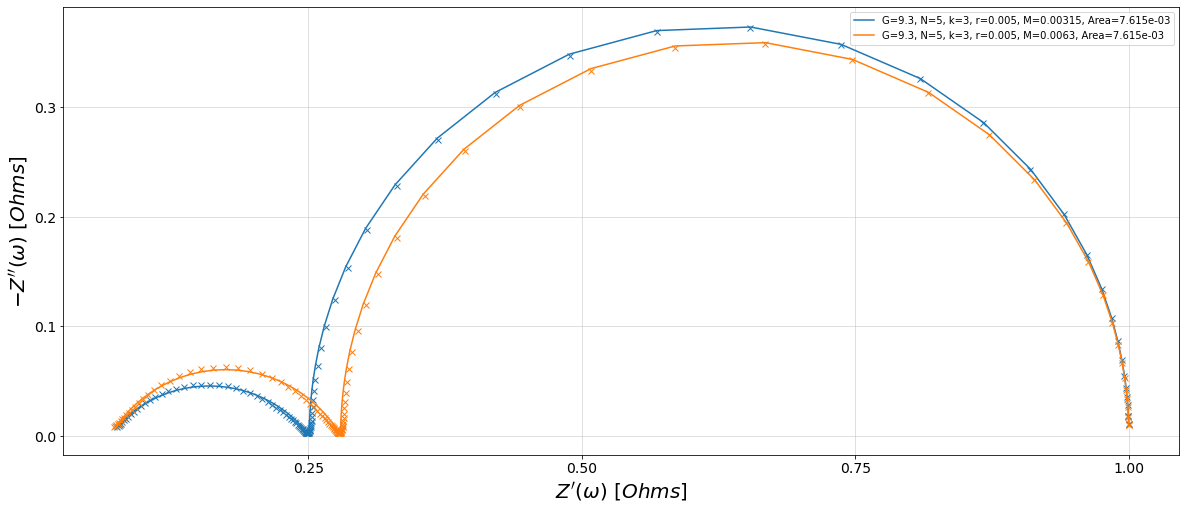

In [56]:
fs, Zs, circs = [], [], []
_, ax = plt.subplots(figsize=(20,15))
for i, file in enumerate(all_files):
    print(file.split('holes\\')[-1])
    
    dum = pd.read_csv(file, skiprows=4)
    try:
        feats = dum.loc[0, ['G', '# of holes', 'randomness', 'hole radius', 'mask_height', 'Pinhole Area (m^2)']]
        label = f'G={feats[0]}, N={feats[1]}, k={feats[2]}, r={feats[3]}, M={feats[4]}, Area={feats[5]:.3e}'
        print(label)
    except KeyError:
        print(file.split('holes\\')[-1])
    
    ax, f, Z, circ = an_com.fit_R_RCPE_RC(file, ax, ind=label, scale=True, a_init=.5, return_ax=True) #, a_init=.9)
    peak_inds = signal.find_peaks(-Z.imag)
    print(f'Peak frequencies: {f[peak_inds[0]]}')
    print(f'At: {Z[peak_inds[0]]}')
    print(circ)
    fs.append(f)
    Zs.append(Z)
    circs.append(circ)

#     ax.set_xlim(0,.2)
#     ax.set_ylim(0, .05)
plt.legend()
plt.show()

In [28]:
file_dir = r"A:\BrianGerwe\Research\COMSOL\PatternedFilm_Potentiodynamic\3D\Table Exports\NoHole_Pinholes\\"

# We need to treat data flagged "N-0" differently, since they represent a film without a mask
# Therefore the impedance is calculated a little different in COMSOL
G = r'G-100'
N = '_N-15'
k = 'k-0'
r_h = ''#r'r-5e-3L' #8e-3L"
f_res = r'10pt-dec'
M = ''#"M-0_01L"
pO2 = '_pO2-0_01'

all_files = an_com.get_all_files(file_dir, G, N, k, r_h, f_res, M, pO2)
all_files.sort(key=lambda x: int(x.split('k-')[-1].split('_')[0]))
all_files

# G-100_N-15_k-1_r-5e-3L_f-[1e-3,1e8]_10pt-dec_M-0_01L_1pO2-0_01.csv

['A:\\BrianGerwe\\Research\\COMSOL\\PatternedFilm_Potentiodynamic\\3D\\Table Exports\\NoHole_Pinholes\\G-100_N-15_k-1_r-5e-3L_f-[1e-3,1e8]_10pt-dec_M-0_01L_pO2-0_01_3.csv',
 'A:\\BrianGerwe\\Research\\COMSOL\\PatternedFilm_Potentiodynamic\\3D\\Table Exports\\NoHole_Pinholes\\G-100_N-15_k-1_r-5e-3L_f-[1e-3,1e8]_10pt-dec_M-0_01L_pO2-0_01.csv',
 'A:\\BrianGerwe\\Research\\COMSOL\\PatternedFilm_Potentiodynamic\\3D\\Table Exports\\NoHole_Pinholes\\G-100_N-15_k-1_r-5e-3L_f-[1e-3,1e8]_10pt-dec_M-0_01L_pO2-0_01_2.csv',
 'A:\\BrianGerwe\\Research\\COMSOL\\PatternedFilm_Potentiodynamic\\3D\\Table Exports\\NoHole_Pinholes\\G-100_N-15_k-3_r-5e-3L_f-[1e-3,1e8]_10pt-dec_M-0_01L_pO2-0_01.csv',
 'A:\\BrianGerwe\\Research\\COMSOL\\PatternedFilm_Potentiodynamic\\3D\\Table Exports\\NoHole_Pinholes\\G-100_N-15_k-3_r-5e-3L_f-[1e-3,1e8]_10pt-dec_pO2-0_01.csv',
 'A:\\BrianGerwe\\Research\\COMSOL\\PatternedFilm_Potentiodynamic\\3D\\Table Exports\\NoHole_Pinholes\\G-100_N-15_k-3_r-7_4e-4L_f-[1e-3,1e8]_10pt-dec

G=10, N=10, k=0, r=0.0158, M=0.00126, Area=1.976e-02
Filtered 1 data points with positive Im[Z]
Peak frequencies: [6.30957344e+05 6.30957344e-02]
At: [1.32266928-0.25213112j 7.52728524-5.26359594j]

Circuit string: R0-p(R1,CPE1)-p(R2,C2)
Fit: True

Initial guesses:
     R0 = 8.23e-01 [Ohm]
     R1 = 1.03e+00 [Ohm]
  CPE1_0 = 2.46e-07 [Ohm^-1 sec^a]
  CPE1_1 = 5.00e-01 []
     R2 = 1.06e+01 [Ohm]
     C2 = 2.39e-01 [F]

Fit parameters:
     R0 = 7.75e-01  (+/- 6.39e-03) [Ohm]
     R1 = 1.08e+00  (+/- 7.21e-03) [Ohm]
  CPE1_0 = 2.28e-04  (+/- 1.88e-05) [Ohm^-1 sec^a]
  CPE1_1 = 5.46e-01  (+/- 6.09e-03) []
     R2 = 1.06e+01  (+/- 4.01e-03) [Ohm]
     C2 = 2.22e-01  (+/- 2.27e-04) [F]



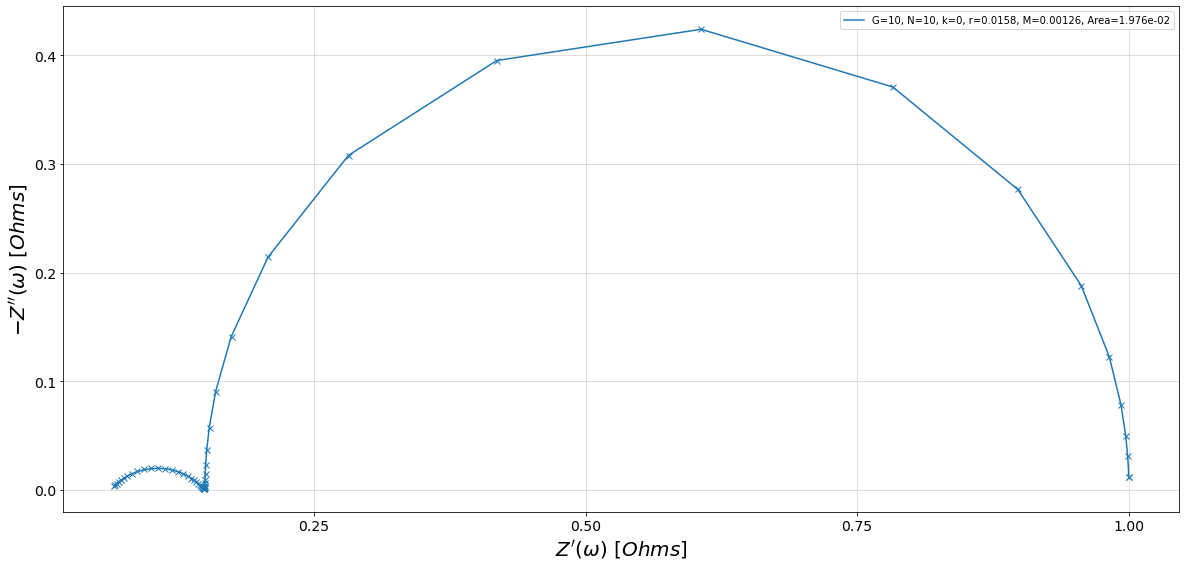

In [27]:
fs, Zs, circs = [], [], []

for i, file in enumerate(all_files[:2]):
#     print(file.split('holes\\')[-1])
    _, ax = plt.subplots(figsize=(20,15))
    dum = pd.read_csv(file, skiprows=4)
    try:
        feats = dum.loc[0, ['G', '# of holes', 'randomness', 'hole radius', 'mask_height', 'Pinhole Area (m^2)']]
        label = f'G={feats[0]}, N={feats[1]}, k={feats[2]}, r={feats[3]}, M={feats[4]}, Area={feats[5]:.3e}'
        print(label)
    except KeyError:
        print(file.split('holes\\')[-1])
    
    ax, f, Z, circ = an_com.fit_R_RCPE_RC(file, ax, ind=label, scale=True, a_init=.5) #, a_init=.9)
    peak_inds = signal.find_peaks(-Z.imag)
    print(f'Peak frequencies: {f[peak_inds[0]]}')
    print(f'At: {Z[peak_inds[0]]}')
    print(circ)
    fs.append(f)
    Zs.append(Z)
    circs.append(circ)

#     ax.set_xlim(.95,1.02)
#     ax.set_ylim(0, .02)
    plt.legend()
    plt.show()

In [469]:
1e6/3.981e5

2.5119316754584275

In [471]:
1.26**()

1.9922349259060792

In [164]:
1/((2*np.pi*1000)**.724 * 4.04e-6)

440.2875551694988

In [180]:
3.82*5.969e-3/(.58*440.3)

8.928700650810185e-05

In [166]:
2.61*1.21e-2

0.031581

In [181]:
5.969e-3*.01

5.9690000000000006e-05

In [217]:
((.005*(1+.580*3)+5*.000032)**2/(.005**2)*.0100)

0.07683983999999999

In [218]:
((.005*(1+.580*5)+5*.000032)**2/(.005**2)*.0100)

0.15460624

In [246]:
((.005*(1+.580*5)+5*.000032)**2 - (.005*(1+.580*5))**2)*.1

6.2656000000000235e-06

In [244]:
.005*(1+.580*5)**2

0.07604999999999999

In [229]:
1/(3.5781/.63)

0.1760710991867192

In [240]:
.63/(.01*.0121)*1e-4/(2*.1)

2.603305785123967

In [241]:
.63/(.01*5.969e-3)*1e-4/(2*.1)

5.277265873680683

In [277]:
2*.1546/1.563*.1

0.01978246960972489

In [281]:
1.563/(2*.07605*.1)*.63*1e-4/5.969e-3

1.084597838338318

In [321]:
(2*.1546*.1/1.563)

0.01978246960972489

In [320]:
(2*1.563/(.1546*.1))

202.1992238033635

In [293]:
(2*.07605*./1.563)

0.009731285988483687

In [236]:
.63*1e-4/.010

0.0063

In [287]:
.63*1e-4/(5.969e-3)/.004

2.6386329368403416

In [291]:
.63*1e-4/(.01*5.969e-3)/(2*.1)

5.277265873680683

In [266]:
1/(.01 * .1536*.0121)*1e-4/2

2.69025482093664

In [268]:
.63/(.01*.0121)*1e-4/.2

2.603305785123967

In [ ]:
.15

In [345]:
A5 = .0121
A3 = 5.969e-3
a = 1.563
a5 = .1546
a3 = 0.07605
h= .1
sig_i = 0.01
L = .63

L*1e-4/(A5*sig_i)/(2*a5/a)

2.63193204537436

In [360]:
.1/.63

0.15873015873015875

In [365]:
1/.63/2

0.7936507936507936

In [361]:
3.82/5.27

0.7248576850094877

In [358]:
3.8/5.27/(a3/h)

0.9531330506370645

In [369]:
(.63*1e-4/.01/5.969e-3*.1)/(5.277)

0.020001007669814986

In [372]:
3.82/5.277

0.7238961531173015

In [371]:
2.603/3.389

0.7680731779285926

In [349]:
a3*A5/(a5*A3)

0.9971799099140297

In [346]:
2*a5/a

0.19782469609724887

In [347]:
2*a3/a

0.09731285988483686

In [307]:
2*a5*h/a

0.01978246960972489

In [300]:
.63*1e-4/(.01*5.969e-3)*(.07605/(2*.1*1.563))

0.25677291727025975

In [264]:
1/(.01* .0121)*1e-4*.63

0.5206611570247934

In [224]:
1/(.01*.1*5.969e-3)*1e-4*.63/2

5.277265873680683

In [256]:
.63/(.01*2*.1536*1.21e-2)*1e-4

1.6948605371900831

In [257]:
.63/(.01*2*.07613*5.969e-3)*1e-4

3.465956832839014

In [273]:
sig_i = 0.01
a = 1.563
A5 = 0.0121
A3 = 5.969e-3
L=0.63

L/(A5)*1e-4/.002

2.6033057851239674

In [274]:
k = 3

lam = .58
ld =32.8
L=.63
h = .01 *L/L
r_h = .005 / L


(r_h*(1+k*lam))**2/((r_h*(1+k*lam))**2*(h+L))

1.5624999999999998

In [259]:
k = 3
r_h = .005
lam = .58
ld =32.8
L=.63
h = .01 *L


(r_h*(1+k*lam)+3*ld)**2/((r_h*(1+k*lam))**2*(h+L))

81097611.31353159

In [201]:
1/(.1*.076132*5.696e-3)*1e-4/2

0.11530092323386289

# Scratch!!

In [189]:
(100/.63)**2*1e-8

0.0002519526329050139

In [179]:
.03158*.58


0.018316399999999997

In [175]:
1.21e-2/(np.pi*.005**2*5)

30.81239698259094

Peak frequencies: [1.25892541e+06 7.94328235e-02]

Circuit string: R0-p(R1,CPE1)-p(R2,CPE2)-G3
Fit: True

Initial guesses:
     R0 = 3.85e-01 [Ohm]
     R1 = 2.47e+00 [Ohm]
  CPE1_0 = 5.12e-08 [Ohm^-1 sec^a]
  CPE1_1 = 7.00e-01 []
     R2 = 7.99e-02 [Ohm]
  CPE2_0 = 2.51e+01 [Ohm^-1 sec^a]
  CPE2_1 = 5.00e-01 []
   G3_0 = 7.99e-02 [Ohm]
   G3_1 = 2.34e+00 [sec]

Fit parameters:
     R0 = 2.61e-01  (+/- 3.92e-03) [Ohm]
     R1 = 1.66e+00  (+/- 3.00e-02) [Ohm]
  CPE1_0 = 6.81e-07  (+/- 2.62e-08) [Ohm^-1 sec^a]
  CPE1_1 = 8.66e-01  (+/- 3.60e-03) []
     R2 = 9.32e-01  (+/- 2.68e-02) [Ohm]
  CPE2_0 = 5.15e-04  (+/- 7.20e-05) [Ohm^-1 sec^a]
  CPE2_1 = 4.63e-01  (+/- 7.95e-03) []
   G3_0 = 1.62e-01  (+/- 7.58e-04) [Ohm]
   G3_1 = 3.92e+00  (+/- 6.56e-02) [sec]



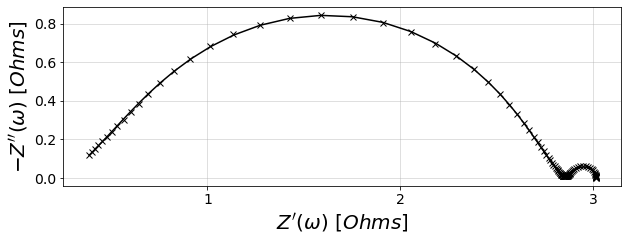

In [126]:
Z_dum = Zs[0]
f_dum = fs[0]

circ_str = "R0-p(R1,CPE1)-p(R2,CPE2)-G3"

peak_inds = signal.find_peaks(-Z_dum.imag)[0]

print(f'Peak frequencies: {f_dum[peak_inds]}')
R1_ind = peak_inds[0]+np.argmax(Z_dum[peak_inds[0]:peak_inds[1]].imag)
R1_init = Z_dum[R1_ind].real - Z_dum[0].real

f_1 = f_dum[peak_inds[0]]
CPE1_init = 1 / (2 * np.pi * f_1 * R1_init)

R2_init = (Z_dum[-1].real - Z_dum[R1_ind].real)/2

f_2 = f_dum[peak_inds[1]]
CPE2_init = 1 / (2 * np.pi * f_2 * R2_init)

inits = [Z_dum[0].real, R1_init, CPE1_init, 0.7, R2_init, CPE2_init, 0.5, R2_init, 2.344]

circ = CustomCircuit(circ_str, initial_guess = inits)
circ.fit(f_dum, Z_dum)

print(circ)

_, ax = plt.subplots(figsize=(10, 7))

plot_nyquist(ax, Z_dum, fmt='kx')
plot_nyquist(ax, circ.predict(f_dum), fmt='k')

plt.show()

Filtered 1 data points with positive Im[Z]


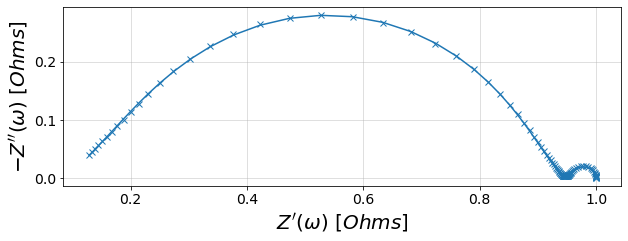


Circuit string: R0-p(R1,CPE1)-p(R2,CPE2)-G3
Fit: True

Initial guesses:
     R0 = 3.86e-01 [Ohm]
     R1 = 2.47e+00 [Ohm]
  CPE1_0 = 5.13e-08 [Ohm^-1 sec^a]
  CPE1_1 = 8.00e-01 []
     R2 = 7.98e-02 [Ohm]
  CPE2_0 = 2.51e+01 [Ohm^-1 sec^a]
  CPE2_1 = 8.00e-01 []
   G3_0 = 7.98e-02 [Ohm]
   G3_1 = 2.34e+00 [sec]

Fit parameters:
     R0 = 2.63e-01  (+/- 3.85e-03) [Ohm]
     R1 = 1.65e+00  (+/- 3.00e-02) [Ohm]
  CPE1_0 = 6.81e-07  (+/- 2.62e-08) [Ohm^-1 sec^a]
  CPE1_1 = 8.67e-01  (+/- 3.60e-03) []
     R2 = 9.31e-01  (+/- 2.68e-02) [Ohm]
  CPE2_0 = 5.09e-04  (+/- 7.11e-05) [Ohm^-1 sec^a]
  CPE2_1 = 4.64e-01  (+/- 7.92e-03) []
   G3_0 = 1.62e-01  (+/- 7.53e-04) [Ohm]
   G3_1 = 3.92e+00  (+/- 6.52e-02) [sec]



In [146]:
Z_dum = Zs[0]
f_dum = fs[0]

_, ax = plt.subplots(figsize=(10,7))

_,_, circ = an_com.fit_R_RCPE_RCPE_G(all_files[0], ax, 2.344, scale=True, return_ax=False)

print(circ)

In [ ]:
R0_init = Zs[0].real

f1 = f_n0[np.argmin(Z_n0.imag)]
R1_init = (Z_n0[-1] - Z_n0[0]).real
C1_init = 1 / (2 * np.pi * f1 * R1_init)

inits = [R0_init, R1_init, C1_init]
print(inits, '\n', f1)
circ = CustomCircuit(circuit=circ_str, initial_guess=inits)
circ.fit(f_n0, Z_n0)
print(circ)

In [58]:
signal.find_peaks(-Zs[0].imag)

(array([29, 91], dtype=int64), {})

In [56]:
print(circs[0])


Circuit string: R0-p(R1,CPE1)-p(R2,C2)
Fit: True

Initial guesses:
     R0 = 2.80e-01 [Ohm]
     R1 = 1.63e+00 [Ohm]
  CPE1_0 = 7.75e-07 [Ohm^-1 sec^a]
  CPE1_1 = 5.00e-01 []
     R2 = 1.77e-01 [Ohm]
     C2 = 1.13e+01 [F]

Fit parameters:
     R0 = 2.43e-01  (+/- 6.20e-03) [Ohm]
     R1 = 1.63e+00  (+/- 7.76e-03) [Ohm]
  CPE1_0 = 5.01e-04  (+/- 3.01e-05) [Ohm^-1 sec^a]
  CPE1_1 = 5.30e-01  (+/- 4.86e-03) []
     R2 = 1.95e-01  (+/- 5.08e-03) [Ohm]
     C2 = 3.98e+00  (+/- 2.94e-01) [F]



In [20]:
file_dir = r"A:\BrianGerwe\Research\COMSOL\PatternedFilm_Potentiodynamic\3D\Table Exports\NoHole_Pinholes"

# We need to treat data flagged "N-0" differently, since they represent a film without a mask
# Therefore the impedance is calculated a little different in COMSOL
G = r"\G-100"
N = r"_N-5"
r_h = r"r-5e-3L"
f_res = r"10pt-dec"
pO2 = "_pO2-0_01"

match_str = G + N + "*" + r_h + "*" + pO2 + "*.csv"   #"_N-[1-9]*10pt-dec_1p*.csv"
all_files = glob.glob(file_dir + match_str)
all_files.sort(key=lambda x: x.split("_N-")[-1].split("_")[0])

match_str_n0 = G + "_N-0" + pO2 + "*.csv"
n0_file = glob.glob(file_dir+G+"_N-0*10pt-dec_p*.csv")

In [21]:
all_files

['A:\\BrianGerwe\\Research\\COMSOL\\PatternedFilm_Potentiodynamic\\3D\\Table Exports\\NoHole_Pinholes\\G-100_N-5_k-10_r-5e-3L_f-[1e-3,1e8]_10pt-dec_M-0_01L_pO2-0_01.csv',
 'A:\\BrianGerwe\\Research\\COMSOL\\PatternedFilm_Potentiodynamic\\3D\\Table Exports\\NoHole_Pinholes\\G-100_N-5_k-0_r-5e-3L_f-[1e-3,1e8]_10pt-dec_pO2-0_01.csv',
 'A:\\BrianGerwe\\Research\\COMSOL\\PatternedFilm_Potentiodynamic\\3D\\Table Exports\\NoHole_Pinholes\\G-100_N-5_k-10_r-5e-3L_f-[1e-3,1e8]_10pt-dec_pO2-0_01.csv',
 'A:\\BrianGerwe\\Research\\COMSOL\\PatternedFilm_Potentiodynamic\\3D\\Table Exports\\NoHole_Pinholes\\G-100_N-5_k-1_r-5e-3L_f-[1e-3,1e8]_10pt-dec_pO2-0_01.csv']

Processing A:\BrianGerwe\Research\COMSOL\PatternedFilm_Potentiodynamic\3D\Table Exports\NoHole_Pinholes\G-100_N-5_k-10_r-5e-3L_f-[1e-3,1e8]_10pt-dec_M-0_01L_pO2-0_01.csv

Filtered 1 data points with positive Im[Z]

Circuit string: R0-p(R1,CPE1)-p(R2,C2)
Fit: True

Initial guesses:
     R0 = 2.80e-01 [Ohm]
     R1 = 1.63e+00 [Ohm]
  CPE1_0 = 7.75e-07 [Ohm^-1 sec^a]
  CPE1_1 = 5.00e-01 []
     R2 = 1.77e-01 [Ohm]
     C2 = 1.13e+01 [F]

Fit parameters:
     R0 = 2.43e-01  (+/- 6.20e-03) [Ohm]
     R1 = 1.63e+00  (+/- 7.76e-03) [Ohm]
  CPE1_0 = 5.01e-04  (+/- 3.01e-05) [Ohm^-1 sec^a]
  CPE1_1 = 5.30e-01  (+/- 4.86e-03) []
     R2 = 1.95e-01  (+/- 5.08e-03) [Ohm]
     C2 = 3.98e+00  (+/- 2.94e-01) [F]

Processing A:\BrianGerwe\Research\COMSOL\PatternedFilm_Potentiodynamic\3D\Table Exports\NoHole_Pinholes\G-100_N-5_k-0_r-5e-3L_f-[1e-3,1e8]_10pt-dec_pO2-0_01.csv

Filtered 15 data points with positive Im[Z]

Circuit string: R0-p(R1,CPE1)-p(R2,C2)
Fit: True

Initial guesses:
     R0 = 2.21e+00

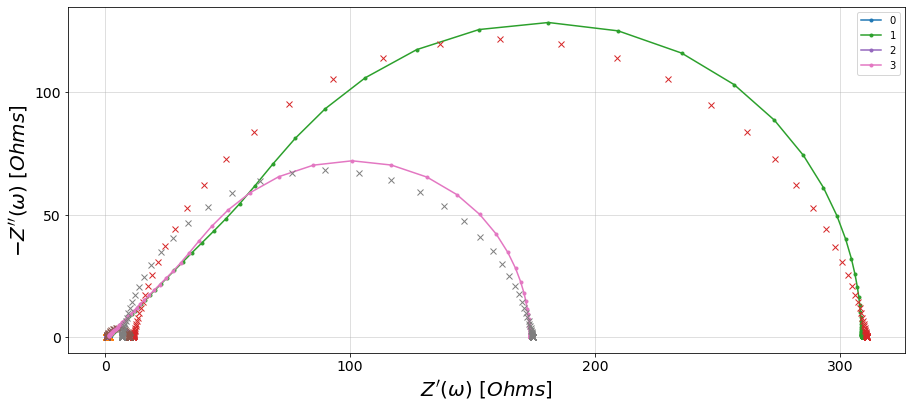

In [22]:
fs, Zs, circs = [], [], []

_, ax = plt.subplots(figsize=(15,10))

for i, file in enumerate(all_files):
    ax, f, Z, circ = an_com.process_n(file, ax, ind=i, return_Z=True, return_ax=True)
        
    fs.append(f)
    Zs.append(Z)
    circs.append(circ)
    print(circ)
ax.legend()
# ax.set_xlim(5,6)
plt.show()

In [12]:
Z

array([0.87441-0.054129j , 0.88138-0.058252j , 0.88882-0.062974j ,
       0.89683-0.068362j , 0.9055 -0.074485j , 0.91492-0.081422j ,
       0.92521-0.089261j , 0.93649-0.0981j   , 0.94889-0.10805j  ,
       0.96258-0.11922j  , 0.97772-0.13174j  , 0.99452-0.14573j  ,
       1.0132 -0.16133j  , 1.034  -0.17867j  , 1.0572 -0.19788j  ,
       1.083  -0.21911j  , 1.1118 -0.2425j   , 1.144  -0.26819j  ,
       1.1798 -0.29633j  , 1.2199 -0.32702j  , 1.2645 -0.36035j  ,
       1.3143 -0.39637j  , 1.3698 -0.43508j  , 1.4315 -0.47639j  ,
       1.5002 -0.52015j  , 1.5763 -0.56605j  , 1.6607 -0.61364j  ,
       1.7537 -0.6623j   , 1.856  -0.71117j  , 1.9678 -0.75922j  ,
       2.0892 -0.80516j  , 2.2201 -0.84754j  , 2.3597 -0.88484j  ,
       2.5068 -0.91557j  , 2.6601 -0.93841j  , 2.8175 -0.95239j  ,
       2.977  -0.95693j  , 3.1362 -0.95195j  , 3.293  -0.93779j  ,
       3.4454 -0.91523j  , 3.5918 -0.88534j  , 3.7308 -0.84936j  ,
       3.8616 -0.80866j  , 3.9836 -0.76455j  , 4.0966 -0.71828

In [12]:
ax.set_xlim(5,6)
plt.show()


Circuit string: R0-p(R1,CPE1),G2
Fit: True

Initial guesses:
     R0 = 8.46e-01 [Ohm]
     R1 = 4.31e+00 [Ohm]
  CPE1_0 = 4.06e-05 [Ohm^-1 sec^a]
  CPE1_1 = 5.23e-01 []
   G2_0 = 2.00e-01 [Ohm]
   G2_1 = 2.34e+00 [sec]

Fit parameters:
     R0 = 8.54e-01  (+/- 2.92e-01) [Ohm]
     R1 = 4.35e+00  (+/- 4.59e+02) [Ohm]
  CPE1_0 = 4.02e-05  (+/- 3.20e+00) [Ohm^-1 sec^a]
  CPE1_1 = 5.18e-01  (+/- 3.87e+04) []
   G2_0 = 1.00e+00  (+/- 2.33e+01) [Ohm]
   G2_1 = 3.44e-01  (+/- 7.31e+00) [sec]



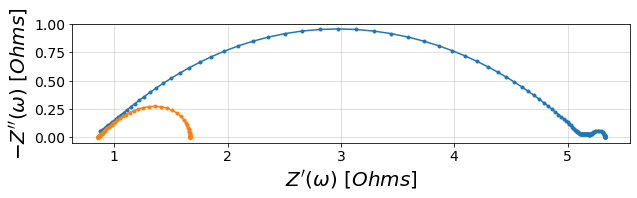

In [18]:
circ_str = "R0-p(R1,CPE1),G2"
params = circ.parameters_
inits=[params[0], params[1], params[2], params[3], .2, 2.344]

lbs = [params[0]*.99, params[1]*.99, params[2]*.99, params[3]*.99, .1, 0.344]
ubs = [params[0]*1.01, params[1]*1.01, params[2]*1.01, params[3]*1.01, 1, 4.344]
circ2 = CustomCircuit(circuit=circ_str, initial_guess=inits)
circ2.fit(f, Z, bounds=(lbs,ubs))
print(circ2)

_, ax2 = plt.subplots(figsize=(10,7))

plot_nyquist(ax2, Z)
plot_nyquist(ax2, circ2.predict(f))

plt.show()

In [5]:
circ.parameters_

array([8.45509517e-01, 4.30891835e+00, 4.06113758e-05, 5.23324503e-01,
       1.65949608e-01, 6.39075525e+00])